In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import exp
from numpy.random import uniform

# http://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html

In [2]:
df = pd.read_csv("iris.csv")
df = df.drop([df.columns[0]], axis=1)
df = df.reset_index(drop=True)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
arr_target = df[df.columns[-1]]
ls = np.array(list(set(arr_target)))
target = np.zeros([len(arr_target), len(ls)])
for ix in range(len(ls)):
    target[np.where(arr_target == ls[ix]), ix] = 1
target

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.

In [4]:
def add_layer(inputs, in_size, out_size, layer_name, activation_function=None):
    l_name = layer_name
    with tf.name_scope(l_name):
        with tf.name_scope(l_name + '_weights'):
            Weights = tf.Variable(tf.random_uniform([in_size, out_size], 1e-3, 1e-2, name='weights'))
            tf.summary.scalar(l_name + '_weights', Weights)
            tf.summary.histogram(l_name + '_weights', Weights)
        with tf.name_scope(l_name + '_biases'):
            biases = tf.Variable(tf.random_uniform([out_size], name='biases'))
            tf.summary.histogram(l_name + '_biases', biases)
        with tf.name_scope(l_name + '_weighted_linear_combination'):
            lr_comb = tf.matmul(inputs, Weights) + biases
        if activation_function is None:
            outputs = lr_comb
        else:
            outputs = activation_function(lr_comb)
            tf.summary.histogram(l_name + '_prediction', outputs)
        return(outputs)

In [8]:
x_data = np.array(df[df.columns[:-1]])
y_data = np.array(target)

with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, x_data.shape[1]], name='x-inputs')
    ys = tf.placeholder(tf.float32, [None, y_data.shape[1]], name='y-inputs')

with tf.name_scope('neuron-outputs'):
    prediction = add_layer(xs, x_data.shape[1], y_data.shape[1], 'neuron', activation_function=tf.nn.softmax)

with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=prediction))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.arg_max(ys, 1), tf.arg_max(prediction, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./sl_mnc_tf', sess.graph)

for i in range(2001):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 100 == 0:
        print(sess.run(accuracy, feed_dict={xs: x_data, ys: y_data}))
#        results = sess.run(merged, feed_dict={xs: x_data, ys: y_data})
#        writer.add_summary(results, i)

0.333333
0.72
0.913333
0.966667
0.966667
0.966667
0.966667
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333
0.973333


In [11]:
def tf_multiclassifier(in_cols, t_col, eta, epochs):
    sess = tf.InteractiveSession()
    
    # pre-processing inputs
    inputs = np.array(df[df.columns[:-1]])
    
    # pre-processing target
    arr_target = df[df.columns[-1]]
    ls = np.array(list(set(arr_target)))
    target = np.zeros([len(arr_target), len(ls)])
    for ix in range(len(ls)):
        target[np.where(arr_target == ls[ix]), ix] = 1
    
    # construct input array
    with tf.name_scope("input"):
        x = tf.placeholder(tf.float32, [None, inputs.shape[1]], name="x-input")
        y_ = tf.placeholder(tf.float32, [None, target.shape[1]], name="y-input")
    
    # initiate weights
    with tf.name_scope("weights"):
        W = tf.Variable(tf.zeros([inputs.shape[1], target.shape[1]]), name="weights")
        mean_W = tf.reduce_mean(W)
        tf.summary.scalar("weights_mean", mean_W)
        tf.summary.histogram("weights_mean", mean_W)
    # initiate biases
    with tf.name_scope("biases"):
        b = tf.Variable(tf.zeros(target.shape[1]), name="biases")
        tf.summary.scalar("biases", b)
        tf.summary.histogram("biases", b)
    
    # neuron activity
    with tf.name_scope("neuron_output"):
        y = tf.nn.softmax(tf.matmul(x, W) + b)
    
    # compute cross-entropy
    with tf.name_scope("cross-entropy"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
        tf.summary.scalar("cost", cross_entropy)
    
    # compute accuracy
    with tf.name_scope("accuracy"):
        with tf.name_scope("correct_prediction"):
            correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))
        with tf.name_scope("accuracy"):
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        tf.summary.scalar("accuracy", accuracy)
    
    # training process
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
    
    summary_op = tf.summary.merge_all()
    
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./mnc_tensorflow/visual")
    writer.add_graph(sess.graph)
    
    for i in range(epochs):
        sess.run(train_step, feed_dict = {x: inputs, y_: target})
        if i % 100 == 0:
            acc = sess.run(accuracy, feed_dict = {x: inputs, y_: target})
            print(i, acc)
            
tf_multiclassifier(df[df.columns[:-1]], df[df.columns[-1]], 0.5, 1000)

0 0.333333
100 0.76
200 0.94
300 0.966667
400 0.966667
500 0.966667
600 0.973333
700 0.973333
800 0.973333
900 0.98


In [3]:
# Multiple Neuron Classifier Normalized by Logistic Function
def multiple_neuron_logistic(input_cols, target_col, eta, conf, iteration):    
    # create a list to store historical accuracy
    accuracy = []
    
    # build array for inputs
    x = np.array(input_cols)
    
    # build target values
    arr_target = np.array(target_col)
    ls = np.array(list(set(arr_target)))
    t = np.zeros([len(arr_target), len(ls)])
    for ix in range(len(ls)):
        t[np.where(arr_target == ls[ix]), ix] = 1
    t_one_ix = np.argmax(t, axis=1)
    
    # initialize random weights (dimension of weights = features * neurons)
    weights = uniform(low=1e-3, high=1e-2, size=[t.shape[1], x.shape[1]])
    # initialize random bias (dimension of bias = 1 * neurons)
    bias = uniform(size=t.shape[1])
    # create a collection to store historical calculated weights & append the initially generated weights
    weights_variation = {}
    for neuron_ix in range(weights.shape[0]):
        neuron_name = "Neuron_" + str(neuron_ix + 1)
        weights_variation[neuron_name] = {}
        for weight_ix in range(weights.shape[1]):
            weight_name = "W" + str(weight_ix + 1)
            weights_variation[neuron_name][weight_name] = []
            weights_variation[neuron_name][weight_name].append(weights[neuron_ix, weight_ix])
    
    y = np.zeros(t.shape) # initialize a collection to store output Y for each round
    
    # learning process
    for i in range(iteration):
        # neuron activity: calculate output y for each round
        for neuron in range(weights.shape[0]):
            a = np.zeros([x.shape[0]])
            b = bias[neuron]
            for feature in range(weights.shape[1]):
                a += weights[neuron, feature] * x[:, feature]
            y[:, neuron] = 1 / (1 + exp(-a - b))
        y_one_ix = np.argmax(y, axis=1)
        # compute accuracy
        acc = np.where((np.equal(t_one_ix, y_one_ix) == True))[0].size / t.shape[0]
        accuracy.append(acc)
        
        # calculate error: error = target - output
        e = t - y
        
        # update weights & bias
        for neuron in range(weights.shape[0]):
            neuron_name = "Neuron_" + str(neuron + 1) # generate corresponding neuron keys in weights_variation dictionary
            # updating weights
            for feature in range(weights.shape[1]):
                weight_name = "W" + str(feature + 1) # generate corresponding weight keys in weights_variation dictionary
                weights[neuron, feature] = weights[neuron, feature] - eta * ((-e[:, neuron] * x[:, feature]).sum())
                # append weights to weights_variation dictionary
                weights_variation[neuron_name][weight_name].append(weights[neuron, feature])
            # updating bias
            bias[neuron] = bias[neuron] - eta * ((-e[:, neuron]).sum())
    
    return(accuracy, weights_variation)

out_logistic = multiple_neuron_logistic(df[df.columns[:4]], df[df.columns[4]], 0.1, 0.95, 1000)

C:\Users\chong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


In [6]:
# Multiple Neuron Classification Normalized by Softmax Function
def multiple_neuron_softmax(input_cols, target_col, eta, iteration):    
    # create a list to store historical accuracy
    accuracy = []
    
    # declear inputs
    x = np.array(input_cols) # input dataset (dimension = number of individuals * number of features)
    X = np.insert(x, x.shape[1], 1, axis=1) # Matrix X: insert last column being the coefficients for bias (dimension = number of individuals * (number of features + 1))
    
    # build target values
    arr_target = np.array(target_col)
    ls = np.array(list(set(arr_target)))
    t = np.zeros([len(arr_target), len(ls)])
    for ix in range(len(ls)):
        t[np.where(arr_target == ls[ix]), ix] = 1
    # get index of ones by row for comparison with output y to compute accuracy of classification
    t_one_ix = np.argmax(t, axis=1)
    
    # initialize random weights (dimension of weights = features * neurons)
    weights = uniform(low=1e-3, high=1e-2, size=[x.shape[1], t.shape[1]])
    # initialize random bias (dimension of bias = 1 * neurons)
    bias = uniform(size=t.shape[1])
    # Matrix W: insert last row for bias (dimension = (number of weights + 1) * number of neurons)
    W = np.insert(weights, weights.shape[0], bias, axis=0)
    # create a collection to store historical calculated weights & append the initially generated weights
    weights_variation = {}
    for neuron_ix in range(weights.shape[1]):
        neuron_name = "Neuron_" + str(neuron_ix + 1)
        weights_variation[neuron_name] = {}
        for weight_ix in range(weights.shape[0]):
            weight_name = "W" + str(weight_ix + 1)
            weights_variation[neuron_name][weight_name] = []
            weights_variation[neuron_name][weight_name].append(weights[weight_ix][neuron_ix])
    
    # learning process
    for i in range(iteration):
        # neuron activity/output: compute inner product of Matrix X & W
        inner_product = np.dot(X, W)
        # compute y by normalizing inner_product of X & W based on softmax function
        y = exp(inner_product) / exp(inner_product).sum(axis=1).reshape(t.shape[0], 1)
        # compute accuracy of classification
        y_one_ix = np.argmax(y, axis=1)
        acc = np.where(np.equal(t_one_ix, y_one_ix) == True)[0].size / t.shape[0]
        accuracy.append(acc)
        # initialize an empty array to translate
        out_class = np.zeros(t.shape)
        
        # compute error e
        e = t - y
        
        # update weights & bias
        for neuron in range(W.shape[1]):
            neuron_name = "Neuron_" + str(neuron + 1)
            # update weights
            for weight in range(W.shape[0] - 1):
                weight_name = "W" + str(weight + 1)
                W[weight, neuron] = W[weight, neuron] - eta * ((-e[:, neuron] * X[:, weight]).sum() / e.shape[0])
                weights_variation[neuron_name][weight_name].append(W[weight, neuron])
            # update bias
            W[W.shape[0] - 1, neuron] = W[W.shape[0] - 1, neuron] - eta * ((-e[:, neuron]).sum() / e.shape[0])
    #return(weights_variation)
    return(accuracy, weights_variation)

out_softmax = multiple_neuron_softmax(df[df.columns[:3]], df[df.columns[4]], 0.1, 10000)

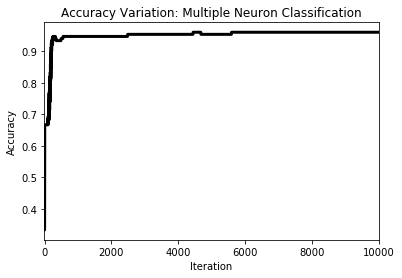

In [7]:
def accuracy_variation(accuracy_array):
    curve, = plt.plot(accuracy_array, color='k', linewidth=3)
    plt.xlim([-10, len(accuracy_array)])
    plt.title("Accuracy Variation: Multiple Neuron Classification")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
accuracy_variation(out_softmax[0])

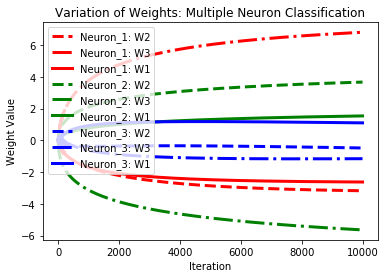

In [8]:
def weights_variation(weight_variation):
    line_style = ["-", "--", "-.", ":"]
    color_platte = ["r", "g", "b"]

    for neuron in weight_variation.keys():
        neuron_ix = int(neuron.replace("Neuron_", "")) - 1
        for weight in weight_variation[neuron].keys():
            weight_ix = int(weight.replace("W", "")) - 1
            curve, = plt.plot(weight_variation[neuron][weight],
                              label = neuron + ": " + weight,
                              color = color_platte[neuron_ix],
                              linestyle = line_style[weight_ix], linewidth=3)
    plt.legend(loc=2)
    plt.title("Variation of Weights: Multiple Neuron Classification")
    plt.xlabel("Iteration")
    plt.ylabel("Weight Value")
    plt.show()
weights_variation(out_softmax[1])